<a href="https://colab.research.google.com/github/SamuelVanWilson/Machine-Learning-Daily-Projects/blob/main/DAY_3_KLASIFIKASI_JENIS_BUNGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**KLASIFIKASI JENIS BUNGA IRIS**

###IMPORT LIBRARY

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

library `pandas` untuk menampilkan, dan memanipulasi data, pokoknya library ini yang menanggani dataset

library `numpy` digunakan untuk komputasi numerik, karena kebanyakan model lebih stabil mengunakan aritmatika yang digunakan oleh library `numpy` tidak dengan aritmatika python biasa

---

`from sklearn.model_selection import train_test_split` digunakan untuk membagi dataset menjadi data training dan data test

`from sklearn.linear_model import LogisticRegression` digunakan untuk algoritma model klasifikasi walaupun namanya 'regression' ini bukan algoritma regresi(prediksi nilai kontinu) tapi untuk klasifikasi(prediksi kategori), 'logistic regression' sangat cocok untuk klasifikasi multi-kelas sederhana

`from sklearn.metrics import accuracy_score, confusion_matrix, classification_report` package `metrics` berisi fungsi-fungsi yang digunakan untuk mengukur performa model klasifikasi, berikut ini penjelasan fungsi-fungsinya:
- `accuracy_score` berguna untuk menghitung akurasi model(persentase prediksi yang benar)
- `confusion_matrix` digunakan untuk membuat tabel untuk menunjukan jumlah prediksi benar/salah untuk setiap kelas

- `classification_report` untuk menampilkan laporan lengkap untuk analisis detail performa per fitur/kelas

---

`matplotlib` digunakan untuk visualisasi data

`import seaborn as sns` digunakan untuk visualisasi data seaborn dibangun diatas matplotlib untuk visualisasi yang lebih rumit

###LOAD DATASET DARI CSV

In [ ]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
data = pd.read_csv(url)

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


variabel `url` untuk menyimpan sumber link data

variabel `data` untuk menyimpan data yang didapat oleh variabel `url`. `pd.read_csv(url)` fungsi untuk membaca data 'csv' supaya bisa dimanipulasi

`data.head(5)` menampilkan data(record) dari 5 teratas

###MELAKUKAN EKSPLORASI DATA SEDERHANA


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Deskripsi statistik:


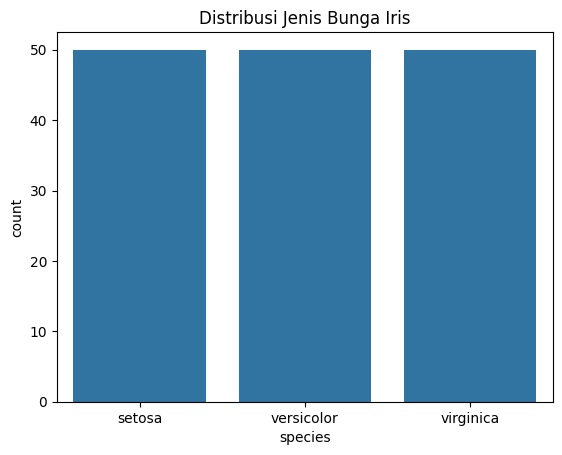

In [ ]:
print("\nInformasi dataset:")
data.info()

print("\nDeskripsi statistik:")
data.describe()

sns.countplot(x='species', data=data)
plt.title('Distribusi Jenis Bunga Iris')
plt.show()

Seperti biasa pada saat sebelum melakukan modeling kita melakukan **Explorary Data Analysis** atau **EDA** terlebih dahulu untuk melakukan pengolahan data, karena ini sangat penting untuk membersihkan dataset yang kotor, seperti nilai outlier, missing values, dan fitur yang tidak diperlukan. karena pada dasarnya **model yang sempurna tergantung pada dataset yang dimilikin, semakin dataset bagus yang dimilikin(datanya tidak kotor), semakin bagus juga output model yang dihasilkan**

---

`data.info()` untuk menampilkan informasi dataset

`data.describe` untuk melihat deskripsi

---

`sns.countplot(x='species', data=data)` digunakan untuk menampilkan distribusi data dalam bentuk diagram batang yang menunjukanjumlah data untuk setiap kategori(spesies bunga). parameter `x='species'` untuk menentukan kolom apa yang kita ingin tampilkan di grafik x(horizontal), dan untuk grafik  y(vertikal) menampilakn jumlah kolom grafik x. paramater `data=data` dataset mana yang ingin ditampilkan dan dibandingkan untuk membuat diagram batang

`plt.title('Distribusi Jenis Bunga Iris')` memberikan judul pada grafik distribusi

`plt.show` untuk nenampilkan grafik diagram yang sudah diatur

###PERSIAPAN DATA

In [ ]:
x = data.drop('species', axis=1)
y = data['species']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

variabel `x` digunakan sebagai fitur(input) untuk pelatihan data training dan data test

variabel `y` digunakan sebagai target/output yang dihasilkan sebagai prediksi data training dan data test

---

`x_train, y_train, x_test, y_test = train_test_split(x,y,test_size=0.2,random_state=80)` digunakan untun memisahkan variabel yang ingin dijadikan data test dan data training.

**data training**
- `x_train` sebagai fitur data training
- `y_train` sebagai target data training

**data test**
- `x_test` sebagai fitur data test
- `y_test` sebagai target data test

paramater `test_size` untuk memberitahu kalo kita ingin ngetest data 20% dan untuk training 80%

parameter `random_state=80` digunakan untuk pengacakan data untuk membagi data training dan data test dalam dataset yang kita milikin

###MEMBUAT DAN MELATIH MODEL

In [ ]:
model = LogisticRegression()

model.fit(x_train,y_train)

LogisticRegression()

variabel `model` untuk membuat model dengan algoritma klasifikasi

---

`model.fit(x_train, y_train)` fungsi yang digunakan untuk melatih model

###EVALUASI MODEL


Nilai Akurasi Model: 1.00

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



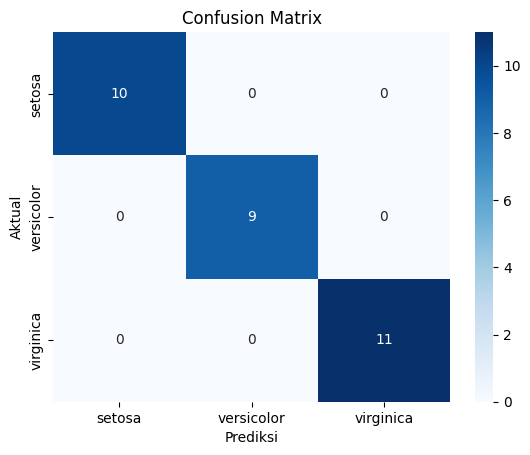

In [ ]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nNilai Akurasi Model: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

variabel `y_pred` berguna untuk menyimpan hasil prediksi dari fungsi `model.predict()`. variabel ini berguna untuk step tes model setelah melakukan training dengan data training

---

variabel `conf_matrix` digunakan untuk menyimpan hasil tabel untuk mencatat berapa banyak prediksi benar/salah untuk setiap kelas dengan menggunakan fungsi `confusion_matrix()`

---

variabel `class_report` untuk menghasilkan laporan 3 metrik penting untuk setiap kelas, yakni:
- precision (false posi)
- recall
- f-1 score

---

`sns.heatmap` digunakan untuk visualisasi dengan warna suhu, parameter penting:
- `conf_matrix` visualisasikan dengan data conf_matrix untuk grafik visualisasi
- `annot=True` untuk menampilkan angka persentase
- `fmt='d'` tampilan angkanya dalam format integer dan bukan desimal
- `cmap='Blues'` gradien warna biru
- `xticklabels` & `yticklabels` digunakan untuk label kelas pada saat visualisasi